<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling-и-Downsampling" data-toc-modified-id="Upsampling-и-Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling и Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/Users/vasily/Learning/Data Analytics/Projects/Churn.csv')
print(df.sample(n=10, random_state=12345))
print(df.info())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
7867       7868    15697201      Yocum          640     Spain  Female   46   
1402       1403    15613282  Vorobyova          757    France    Male   29   
8606       8607    15694581   Rawlings          807     Spain    Male   42   
8885       8886    15815125    Michael          668     Spain    Male   45   
6494       6495    15752846      Pinto          699    France    Male   28   
9628       9629    15596624       Topp          662    France  Female   22   
7459       7460    15583724    Raymond          645     Spain  Female   29   
3964       3965    15714981  Sabbatini          476    France    Male   37   
7000       7001    15739548    Johnson          775    France    Male   28   
4470       4471    15593795     Linton          516   Germany  Female   53   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7867     3.0       0.00              1          1               1   
140

In [3]:
#Уберем ненужные признаки и применим OHE к колонке Gender
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df = pd.get_dummies(df, drop_first=True)
#Проставим 0 вместо NaN в колонке Tenure
df['Tenure'] = df['Tenure'].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB
None


In [4]:
#Разделим выборку на тренировочную, валидационную и тестовую в пропорции 60:20:20

features = df.drop(['Exited'], axis=1)
target = df['Exited']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size=0.4, random_state=1234)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid,
                                                                            test_size=0.5, random_state=1234)
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_valid.shape)

(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


**Вывод**

Мы убрали колонки, которые не понадобятся для обучения:'RowNumber','CustomerId','Surname' и преобразовали категориальный признак (Пол) в численный, а также заполнили пропуски в Tenure нулями.

## Исследование задачи

In [5]:
#Проверим кол-во записей с exited=1 в тренировочном датасете
print(target_train[target_train==1].count())

1222


In [6]:
#Обучим модель логистической регрессии без учета дизбалансов классов
model = LogisticRegression(random_state=123, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 метрика модели линейной регрессии без учета дисбаланса =", f1_score(target_valid, predicted_valid))

F1 метрика модели линейной регрессии без учета дисбаланса = 0.02564102564102564


In [7]:
#Обучим модель случайного леса без учета дизбаланса классов
for depth in range(1, 15):
    model = RandomForestClassifier(n_estimators=10, max_depth=depth, random_state=123)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print(f"При макс. глубине = {depth}, F1 = {f1_score(target_valid, predicted_valid)}")
print()  
for n in range (10, 110, 10):
    model = RandomForestClassifier(n_estimators=n, max_depth=11, random_state=123)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print(f"При кол-ве деревьев = {n} и макс. глубине = 12, F1 = {f1_score(target_valid, predicted_valid)}")

При макс. глубине = 1, F1 = 0.0
При макс. глубине = 2, F1 = 0.12468827930174564
При макс. глубине = 3, F1 = 0.23201856148491878
При макс. глубине = 4, F1 = 0.47584973166368516
При макс. глубине = 5, F1 = 0.5000000000000001
При макс. глубине = 6, F1 = 0.4852941176470588
При макс. глубине = 7, F1 = 0.5333333333333333
При макс. глубине = 8, F1 = 0.537261698440208
При макс. глубине = 9, F1 = 0.5255972696245733
При макс. глубине = 10, F1 = 0.5420240137221269
При макс. глубине = 11, F1 = 0.5397350993377483
При макс. глубине = 12, F1 = 0.5606557377049181
При макс. глубине = 13, F1 = 0.5540983606557377
При макс. глубине = 14, F1 = 0.5380875202593194

При кол-ве деревьев = 10 и макс. глубине = 12, F1 = 0.5397350993377483
При кол-ве деревьев = 20 и макс. глубине = 12, F1 = 0.5503355704697986
При кол-ве деревьев = 30 и макс. глубине = 12, F1 = 0.5482233502538071
При кол-ве деревьев = 40 и макс. глубине = 12, F1 = 0.5457627118644067
При кол-ве деревьев = 50 и макс. глубине = 12, F1 = 0.55892255892

**Вывод**

Количество записей с целевым признаком = 1 в тренировочной выборке составляет 20% от общего числа, то есть выборка сильно несбалансированная.
При несбалансированной классификации максимальное значение метрики F1 = 0.56 на тестовой выборке удалось достичь на модели случайного леса.
Линейная регрессия дала F1 близкий к нулю.

## Борьба с дисбалансом

### Взвешивание классов

In [8]:
#Функция отрисовки ROC кривой и расчета ROC_AUC
def roc(model):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:,1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure(figsize=(6,6))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    print("AUC-ROC = ", roc_auc_score(target_valid, probabilities_one_valid))

F1 метрика модели линейной регрессии с учётом дисбаланса = 0.4233333333333333


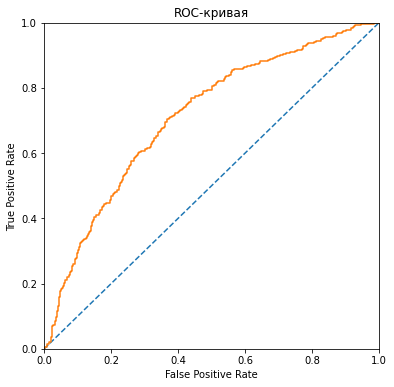

AUC-ROC =  0.7096461979876323
F1 метрика модели случайного леса с учётом дисбаланса = 0.5838150289017341


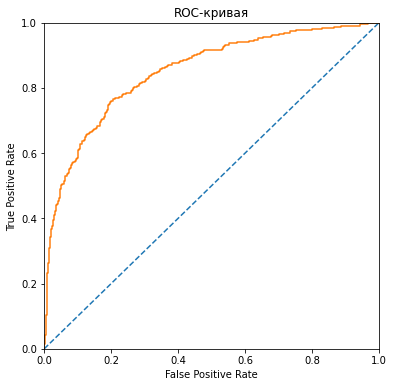

AUC-ROC =  0.8491100906613563


In [9]:
# Применим опцию взвешивания классов в моделях

model = LogisticRegression(random_state=123, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 метрика модели линейной регрессии с учётом дисбаланса =", f1_score(target_valid, predicted_valid))
roc(model)

model = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 метрика модели случайного леса с учётом дисбаланса =", f1_score(target_valid, predicted_valid))
roc(model)

### Upsampling и Downsampling

In [10]:
# Функции для Up- и Downsampling тренировочной выборки

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    return features_downsampled, target_downsampled

F1 модели случайного леса с upsampling = 0.5889884763124199


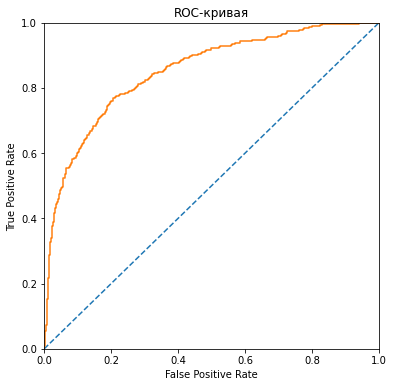

AUC-ROC =  0.8509393669426684


In [11]:
# Обучим модель случайного леса, применив увеличение выборки для выравниания записей с целевым показателем = 1 и 0

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_ups = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123)
model_ups.fit(features_upsampled, target_upsampled)
predictions_valid = model_ups.predict(features_valid)
print("F1 модели случайного леса с upsampling =", f1_score(target_valid, predictions_valid))
roc(model_ups)

F1 модели случайного леса с downsampling = 0.5617283950617283


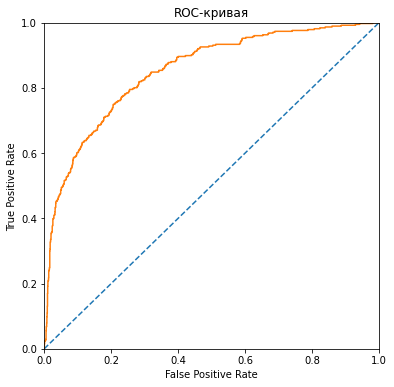

AUC-ROC =  0.8510056925374699


In [12]:
# Обучим модель случайного леса, применив уменьшение выборки для выравниания записей с целевым показателем = 1 и 0

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

model_dwn = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123)
model_dwn.fit(features_downsampled, target_downsampled)
predictions_valid = model_dwn.predict(features_valid)
print("F1 модели случайного леса с downsampling =", f1_score(target_valid, predictions_valid))
roc(model_dwn)

F1 модели случайного леса с up+downsampling = 0.5977272727272727


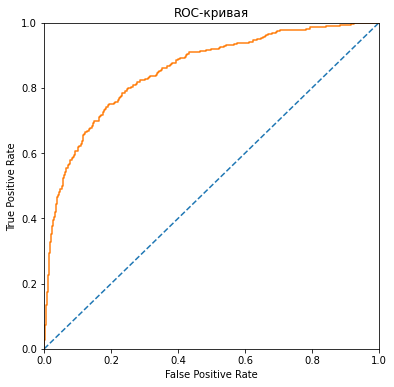

AUC-ROC =  0.8536022167487683


In [13]:
#Обучим модель случайного леса, применив одновременно up- и downsampling 

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)
features_updownsampled, target_updownsampled = upsample(features_downsampled, target_downsampled, 2)

model_up_down = RandomForestClassifier(n_estimators=90, max_depth=12, random_state=123)
model_up_down.fit(features_updownsampled, target_updownsampled)
predictions_valid = model_up_down.predict(features_valid)
print("F1 модели случайного леса с up+downsampling =", f1_score(target_valid, predictions_valid))
roc(model_up_down)

**Вывод**

Наилучшего качества модели (наибольшего F1) удалось достичь на модели случайного леса при применении **upsampling и up+downsampling**. При использовании upsampling, **F1 = 0.59 на валидационной выборке**. С up+downsampling F1 = 0.60, однако на тестовой выборке он покажет чуть худшее значение, чем модель, обученная на данных с upsampled.
Площадь под ROC кривой у всех моделей случайного леса со стратегиями дизбаланса классов примерно одинаковая: **~0.85**.

## Тестирование модели

In [14]:
predictions_test = model_ups.predict(features_test)
print("F1 на тестовой выборке =", f1_score(target_test, predictions_test))

F1 на тестовой выборке = 0.6153846153846153
